In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = yf.download('ADA-USD',start='2021-01-02')

[*********************100%***********************]  1 of 1 completed


In [3]:
df['SMA'] = df.Close.rolling(window=20).mean()

In [4]:
df['stddev'] = df.Close.rolling(window=20).std()

In [5]:
df['Upper'] = df.SMA + 2 * df.stddev
df['Lower'] = df.SMA - 2 * df.stddev

In [6]:
df['Buy_Signal'] = np.where(df.Lower > df.Close ,True,False)
df['Sell_Signal'] = np.where(df.Upper < df.Close ,True,False)

In [7]:
df = df.dropna()

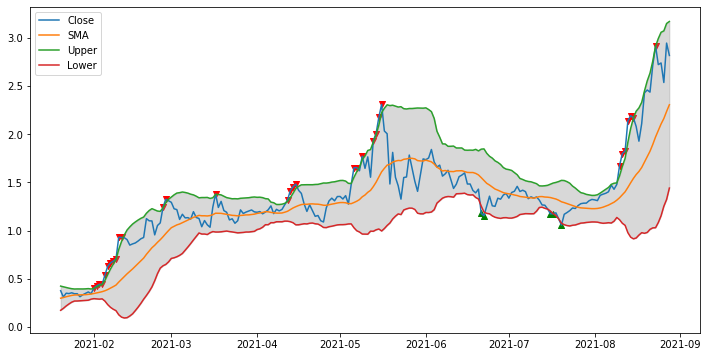

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.scatter(df.index[df.Buy_Signal],df[df.Buy_Signal].Close,marker = '^',color='g')
plt.scatter(df.index[df.Sell_Signal],df[df.Sell_Signal].Close,marker = 'v',color='r')
plt.fill_between(df.index,df.Upper,df.Lower,color='grey',alpha=0.3)
plt.legend(df[['Close','SMA','Upper','Lower']])
plt.show()

In [9]:
buys = []
sells = []
open_pos = False

for i in range(len(df)):
    if df.Lower[i] > df.Close[i]:
        if open_pos == False:
            buys.append(i)
            open_pos = True
    elif df.Upper[i] < df.Close[i]:
        if open_pos:
            sells.append(i)
            open_pos = False

In [10]:
buys

[152]

In [11]:
sells

[202]

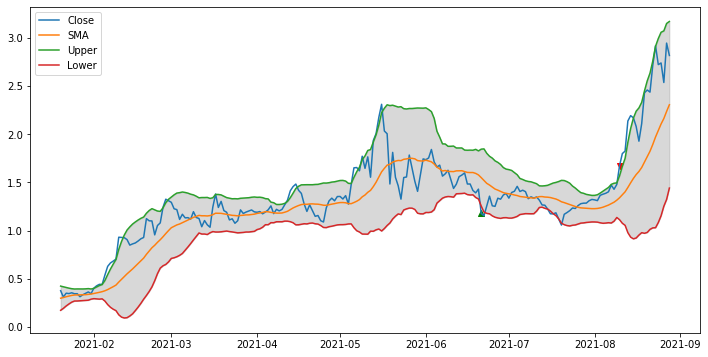

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df[['Close','SMA','Upper','Lower']])
plt.scatter(df.iloc[buys].index,df.iloc[buys].Close,marker = '^',color='g')
plt.scatter(df.iloc[sells].index,df.iloc[sells].Close,marker = 'v',color='r')
plt.fill_between(df.index,df.Upper,df.Lower,color='grey',alpha=0.3)
plt.legend(df[['Close','SMA','Upper','Lower']])
plt.show()

In [13]:
merged = pd.concat([df.iloc[buys].Close,df.iloc[sells].Close],axis=1)

In [14]:
merged.columns = ['Buys','Sells']

In [15]:
merged

,Buys,Sells
Date,,
2021-06-21,1.17748,NaN
2021-08-10,NaN,1.672566


In [16]:
total_profit = merged.shift(-1).Sells - merged.Buys

In [17]:
rel_profit = (merged.shift(-1).Sells - merged.Buys)/merged.Buys

In [18]:
print(f'{rel_profit.mean() * 100}%') 

42.04624123429828%
